In [1]:
################################################
#all the needed imports
#

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import copy
import math

import cv2 

key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)

#set maximum wanted resolution - if not reachable, set the closest value
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
webcam.set(cv2.CAP_PROP_GIGA_FRAME_HEIGH_MAX, 1080)

width = webcam.get(cv2.CAP_PROP_FRAME_WIDTH)
height = webcam.get(cv2.CAP_PROP_FRAME_HEIGHT)
print(width, height)


while True:
    try:
        check, frame = webcam.read()
        print(check) #prints true as long as the webcam is running
        print(frame) #prints matrix values of each framecd 
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'): 
            cv2.imwrite(filename='saved_img.jpg', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.jpg', cv2.IMREAD_GRAYSCALE)
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Converting RGB image to grayscale...")
            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            print("Converted RGB image to grayscale...")
            print("Resizing image to 28x28 scale...")
            img_ = cv2.resize(gray,(28,28))
            print("Resized...")
            img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
            print("Image saved!")
        
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break
    

In [2]:
webcam = cv2.VideoCapture(0)
key = cv2. waitKey(1)

#set maximum wanted resolution - if not reachable, set the closest value
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
webcam.set(cv2.CAP_PROP_GIGA_FRAME_HEIGH_MAX, 720)

width = webcam.get(cv2.CAP_PROP_FRAME_WIDTH)
height = webcam.get(cv2.CAP_PROP_FRAME_HEIGHT)

print("CURRENT RESOLUTION: ", width, ":", height)

arr = []
counter = 0

MAX_IMG = 2

while True:
    try:
        check, frame = webcam.read()
        #print(frame)
        #print(check)
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if(key == ord('q')):
            print("Turning off camera.")
            webcam.release()            #turning off camera
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        elif(key == ord('c')):            #capture 1 frame
            counter = 0
            #arr = np.array(frame)
            print("start")

            #webcam.release()
            #cv2.destroyAllWindows()

            #print(arr.shape)

            #color conversion
            #img = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)

            #img = Image.fromarray(arr, "RGB")

            # fig, axs = plt.subplots(1, 2, figsize=[20,10])
            # axs[0].imshow(arr)
            # axs[1].imshow(img)
            # plt.show()
        
        if(counter >= 0 and counter < MAX_IMG*2+24):
            #print("next", counter)
            if(counter >= 24):
                arr.append(np.array(frame))
                print("appended", counter)
            #webcam.release()
            counter += 1
            
        elif(counter == MAX_IMG*2+24):
            webcam.release()
            cv2.destroyAllWindows()
            break

    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

CURRENT RESOLUTION:  1280.0 : 720.0
appended 24
appended 25
appended 26
appended 27


In [3]:
img = copy.deepcopy(arr)

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
0 done
1 done
2 done
3 done


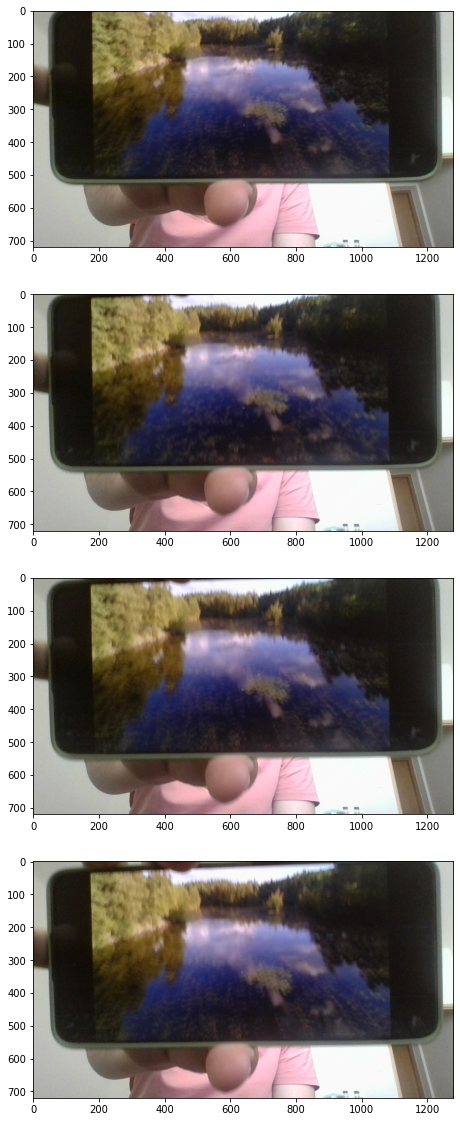

In [4]:
for i in img:
    print(i.shape)

#print(len(img[0]))



for i in range(MAX_IMG*2):
    img[i] = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
    print(i, "done")

########################################
# COLOR CHECKING
#

fig, axs = plt.subplots(MAX_IMG*2, 1, figsize=[20,20])
# temp_R = np.zeros_like(img[3])
# temp_G = np.zeros_like(img[3])
# temp_B = np.zeros_like(img[3])
# temp_R[:,:,0] = img[3][:,:,0]
# temp_G[:,:,1] = img[3][:,:,1]
# temp_B[:,:,2] = img[3][:,:,2]

# axs[0].imshow(img[3])
# axs[1].imshow(temp_R)
# axs[2].imshow(temp_G)
# axs[3].imshow(temp_B)

#
#########################################

counter = 0


for i in img:
    axs[counter].imshow(i)
    counter += 1


plt.show()

In [5]:
#set length of whole array in 1D
len_R = img[0][:,:,0].size
#print(len_R)

m = len_R

arr1D_R1 = []
arr1D_R2 = []
arr1D_G1 = []
arr1D_G2 = []
arr1D_B1 = []
arr1D_B2 = []

redXOR = []
greenXOR = []
blueXOR = []

#for each image pair
for i in range(0, MAX_IMG*2, 2):
    # for each RED pixel
    arr1D_R1.append(img[i][:,:,0].flatten())
    arr1D_R2.append(np.flip(img[i+1][:,:,0].flatten()))
    # for each GREEN pixel
    arr1D_G1.append(img[i][:,:,1].flatten())
    arr1D_G2.append(np.flip(img[i+1][:,:,1].flatten()))
    # for each BLUE pixel
    arr1D_B1.append(img[i][:,:,2].flatten())
    arr1D_B2.append(np.flip(img[i+1][:,:,2].flatten()))

for i in range(MAX_IMG):
    # XOR red values of pair images
    redXOR.append(arr1D_R1[i] ^ arr1D_R2[i])
    print("red_XOR_{}".format(i), redXOR[i])

    # XOR green values of pair images
    greenXOR.append(arr1D_G1[i] ^ arr1D_G2[i])

    # XOR blue values of pair images
    blueXOR.append(arr1D_B1[i] ^ arr1D_B2[i])
    
# create Z array of R^, G^, B^ array elements interlaced as Z = {r^0, g^0, b^0, r^1, g^1, b^1, ..., r^n-1, g^n-1, b^n-1}, where length = 3n
Z = []

for i in range(MAX_IMG):
    aux = []
    #iterate with "it" over all redXOR/greenXOR/blueXOR arrays AND concatenate each element at [it] position as in pattern shown ^here^
    for it in range(len(redXOR[i])):
        aux.append(redXOR[i][it])
        aux.append(greenXOR[i][it])
        aux.append(blueXOR[i][it])
    Z.append(aux)


print(len(Z[0]))



# arr1D_R2 = img[i][:,:,0].flatten()

    
# print("REG ", end="")
# for i in range(3):
#     print(arr1D_R1[i], end=" ")
# print(" ... ", end="")
# for i in reversed(range(3)):
#     print(arr1D_R1[len(arr1D_R1)-i-1], end=" ")
# print("")
# print("FLAT", arr1D_R2)

# print("REVERSED:", np.flip(arr1D_R2))

red_XOR_0 [210 219 211 ... 221 209 208]
red_XOR_1 [208 220 223 ... 210 215 214]
2764800


In [7]:
#POST-PROCESSING_MODIFIED_LOGISTIC_MAP_ALGORITHM

'''
"Based on the results of statistical testing, the size of the CCML is set to
L = 6 to achieve a balance between performance and statistical quality of the generated
random numbers. If the available data is not a multiple of 6, values from the beginning of
the dataset will be repeated. 
--> Each logistic map is iterated 50 times to eliminate transient effects." ~4.4 Postprocessing (s. 6)
'''
L = 6
MAX_T = 50

'''
Initial control parameters - r^i_0 = 3.9 <-- set to ensure that the logistic maps operate
within their chaotic region.
'''
r = []
for i in range(MAX_T):
    r.append([])

for i in range(L):
    r[0].append(np.float64(3.9))

'''
"For further entropy amplification, the control parameters will be recalculated as

    r^i_t = r^i_t + 0.001*x^i_t + c,                                        (6)

where c is a small constant. Any arbitrary value for c within the range of [0.001, 0.005]
can be chosen, but c = 0.002 was chosen for the implementation of the TRNG in this paper.
The value of c ensures that r^i_t will be modified even though x^i_t ~= 0. If a situation
arises where r^i_t > 4 after computing (6), it will be further recalculated as

    r^i_t = 3.9 + 0.0025*r^i_t,                                             (7)

which prevents the logistic maps from being iterated out of scope."
'''

def logisticMap(x, r, c):
    #x <- need to be deepcopy

    if(x == 0):
        x = r/4
    
    r = r + 0.001 * x + c
    if(r > 4):
        r = 3.9 + 0.0025 * r 
    
    for i in range(MAX_T):
        x = r * x * (1 - x)

    return x, r

In [29]:
#POST-PROCESSING_SETTING_VALUES_CCML

c = np.float64(0.002)

x = []                         #initial call for x^i_0 where i = {0, L-1}

epsilon = np.float64(0.5)       # "The coupling coefficient is set to 0.5 to ensure that the current chaotic state 
                                # will have heavier weightage on the result of calculating"

j = 0

out = []

for it in range(MAX_IMG):
    out.append([])          #append new subarray

    #for each new image pair - set helping array's values
    r = []
    for i in range(L):
        r.append(np.float64(3.9))

    while(j < 1):
        x = []
        for i in range(L):
            x.append([])

        # Normalization based on formula presented in (5)
        for i in range(L):
            auxVar = np.float64((Z[it][i+j] - min(Z[it])) / (max(Z[it]) - min(Z[it])))
            x[0].append(auxVar)

        # Iterate CCML for full diffusion
        print("x: ", x)
        print("r: ", r)
        for t in range(math.floor(L/2)):
            #df = False
            print("t", t)
            # Loop for each local map
            for i in range(L):
                print("i", i)
                #print(r[1][0])
                xLog1, r[i] = logisticMap(x[t][i], r[i], c)
                xLog2, r[(i+1)%L] = logisticMap(x[t][(i+1)%L], r[(i+1)%L], c)
                xLog3, r[(i-1)%L] = logisticMap(x[t][(i-1)%L], r[(i-1)%L], c)

                auxVar = epsilon * xLog1 + (epsilon/2) * (xLog2 + xLog3)
                x[t+1].append(np.float64(auxVar))

            print("x_{}: ".format(t), x)
            print("r_{}".format(t), r)

        for i in range(L):
            # Perform operation: 32-bit MSB XOR 32-bit LSB          <-- MSB/LSB - most/least significant bits
            #print(out)
            out[it].append(8)

        j += L


print("r_type", r[0].dtype)




x:  [[0.8235294222831726, 0.8196078538894653, 0.9254902005195618, 0.8588235378265381, 0.8627451062202454, 0.9372549057006836], [], [], [], [], []]
r:  [3.9, 3.9, 3.9, 3.9, 3.9, 3.9]
t 0
i 0
i 1
i 2
i 3
i 4
i 5
x_0:  [[0.8235294222831726, 0.8196078538894653, 0.9254902005195618, 0.8588235378265381, 0.8627451062202454, 0.9372549057006836], [0.5774178997604498, 0.5952631382248108, 0.28983767561369467, 0.5079118815136449, 0.7223418517284641, 0.46731857002465904], [], [], [], []]
r_0 [3.9084705882668493, 3.9084588235616673, 3.9087764706015573, 3.9085764706134785, 3.9085882353186605, 3.908811764717101]
t 1
i 0
i 1
i 2
i 3
i 4
i 5
x_1:  [[0.8235294222831726, 0.8196078538894653, 0.9254902005195618, 0.8588235378265381, 0.8627451062202454, 0.9372549057006836], [0.5774178997604498, 0.5952631382248108, 0.28983767561369467, 0.5079118815136449, 0.7223418517284641, 0.46731857002465904], [0.32896478192820217, 0.7480869355304968, 0.4160940356273586, 0.32886090572476706, 0.34701030331131644, 0.5696989724

In [65]:
import struct
def binary(num, typ = 'd'):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!{}'.format(typ), num))

var = np.float64(0.5005536471312619)
print(binary(var, 'd'))

varI = np.int64(int(binary(var), 2))
print(binary(varI, 'q'))
print(np.binary_repr(varI >> 32))


print(binary(varI>>32, 'q'))




print("MSB")
MSB = varI >> 32
print(binary(varI, 'q'))
print(binary(MSB, 'q'))


print("LSB")
maskL = np.int64(0xFFFFFFFF)
LSB = maskL & varI

print(binary(varI, 'q'))
print(binary(maskL, 'q'))
print(binary(LSB, 'q'))

print(binary(np.int32(maskL), 'i'))
print(binary(np.int32(LSB), 'i'))

# var = np.float64(0.5005536471312610)
# print(binary(var, 'd'))





0011111111100000000001001000100100010101000010100101000000111100
0011111111100000000001001000100100010101000010100101000000111100
111111111000000000010010001001
0000000000000000000000000000000000111111111000000000010010001001
MSB
0011111111100000000001001000100100010101000010100101000000111100
0000000000000000000000000000000000111111111000000000010010001001
LSB
0011111111100000000001001000100100010101000010100101000000111100
0000000000000000000000000000000011111111111111111111111111111111
0000000000000000000000000000000000010101000010100101000000111100
11111111111111111111111111111111
00010101000010100101000000111100
